<a href="https://colab.research.google.com/github/rcagithhub/Project-1/blob/main/Project_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [ ]:
data=pd.read_csv('/day[1].csv')
data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [ ]:
data.head(5)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [ ]:
data[data.columns].nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

In [ ]:
data.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
data['registered'].sum()

2672662

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
data=data.drop(columns:=['instant','dteday'],axis=1)

In [ ]:
data.shape

(731, 14)

In [ ]:
duplicated=data[data.duplicated()]
print('Before dropping duplicates:',data.shape[0])
print('Number of duplicates rows:',len(duplicated))

Before dropping duplicates: 731
Number of duplicates rows: 0


In [ ]:
data.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


<Axes: >

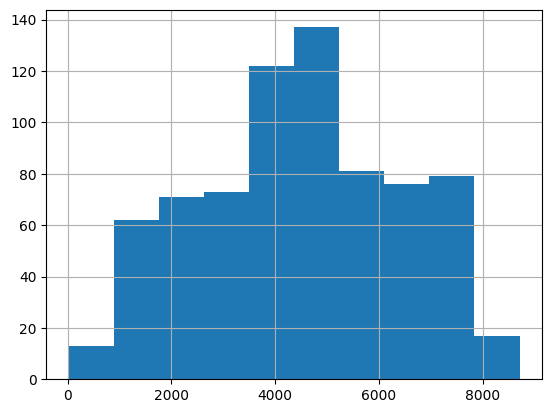

In [ ]:
data.cnt.hist()

<Axes: >

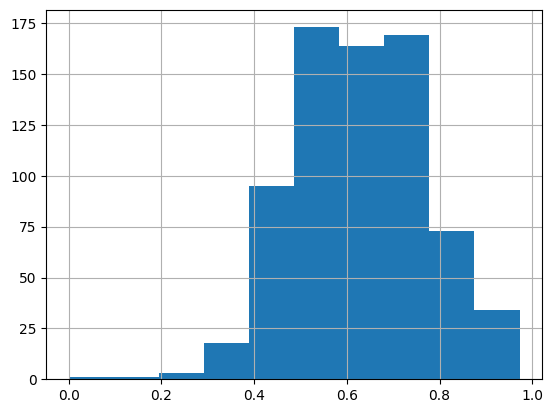

In [ ]:
data.hum.hist()

In [ ]:
data['season']=data.season.astype('category')
data['mnth']=data.mnth.astype('category')
data['weekday']=data.weekday.astype('category')
data['weathersit']=data.weathersit.astype('category')

In [ ]:
data['season']=data.season.replace((1,2,3,4),('Spring','Summer','Fall','Winter'))
data['mnth']=data.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'))
data['weathersit']=data.weathersit.replace((1,2,3,4),('Clear','Misty','Light_rainsnow','Heavy_rainsnow'),inplace=True)
data['weekday']=data.weekday.replace((0,1,2,3,4,5,6),('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'))

In [ ]:
data

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,Spring,0,Jan,0,Saturday,0,None,0.344167,0.363625,0.805833,0.160446,331,654,985
1,Spring,0,Jan,0,Sunday,0,None,0.363478,0.353739,0.696087,0.248539,131,670,801
2,Spring,0,Jan,0,Monday,1,None,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,Spring,0,Jan,0,Tuesday,1,None,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,Spring,0,Jan,0,Wednesday,1,None,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,Spring,1,Dec,0,Thursday,1,None,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,Spring,1,Dec,0,Friday,1,None,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,Spring,1,Dec,0,Saturday,0,None,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,Spring,1,Dec,0,Sunday,0,None,0.255833,0.231700,0.483333,0.350754,364,1432,1796


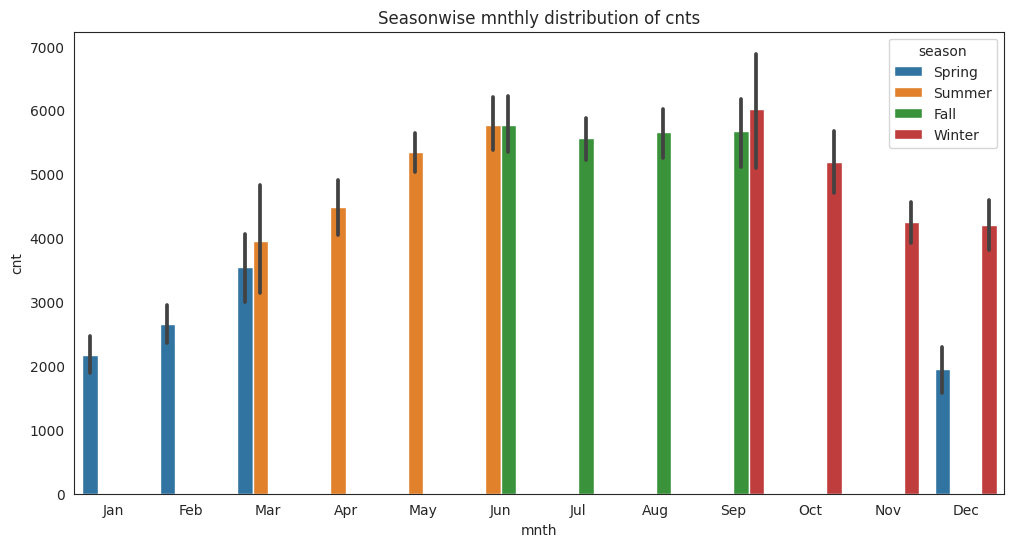

In [ ]:
fig,ax=plt.subplots(figsize=(12,6))
sns.set_style('white')
sns.barplot(x='mnth',y='cnt',data=data[['mnth','cnt','season']],hue='season',ax=ax)
ax.set_title('Seasonwise mnthly distribution of cnts')
plt.show()

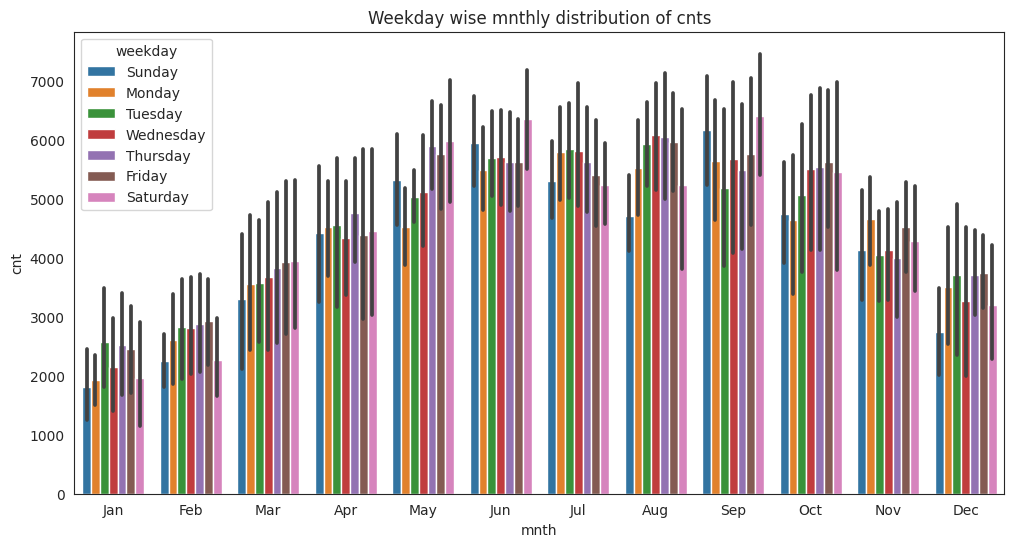

In [ ]:
fig,ax1=plt.subplots(figsize=(12,6))
sns.barplot(x='mnth',y='cnt',data=data[['mnth','cnt','weekday']],hue='weekday',ax=ax1)
ax1.set_title('Weekday wise mnthly distribution of cnts')
plt.show()

<Axes: xlabel='holiday'>

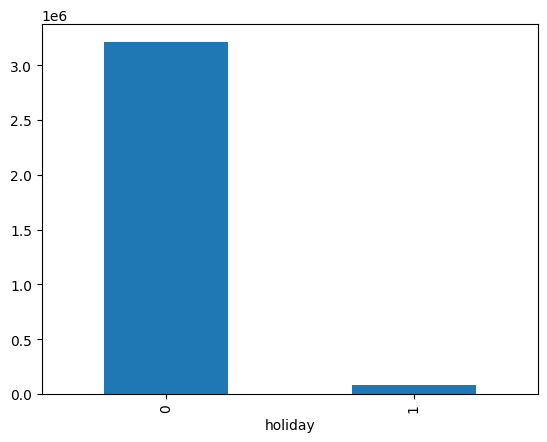

In [ ]:
holiday_data = data['cnt'].groupby(data['holiday']).sum()
holiday_data.plot(kind='bar')

In [ ]:
season : season (1:Spring, 2:Summer, 3:Fall, 4:Winter)
season_data = data['cnt'].groupby(data['season']).sum()
season_data
season_data.plot(kind='bar')

SyntaxError: ignored

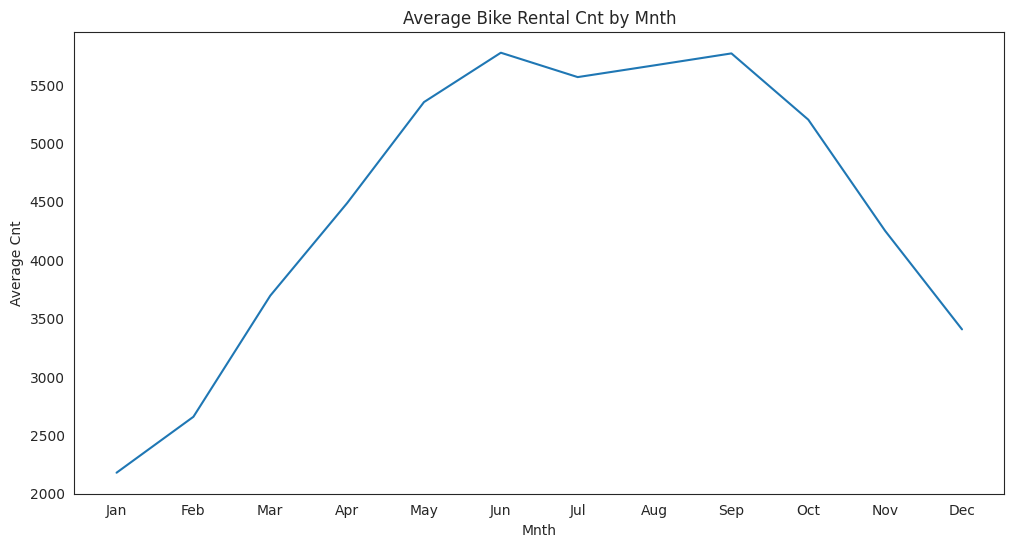

In [ ]:
plt.figure(figsize=(12,6))
mnthly_cnts=data.groupby('mnth')['cnt'].mean()
sns.lineplot(x=mnthly_cnts.index,y=mnthly_cnts.values)
plt.xlabel('Mnth')
plt.ylabel('Average Cnt')
plt.title('Average Bike Rental Cnt by Mnth')
plt.show()

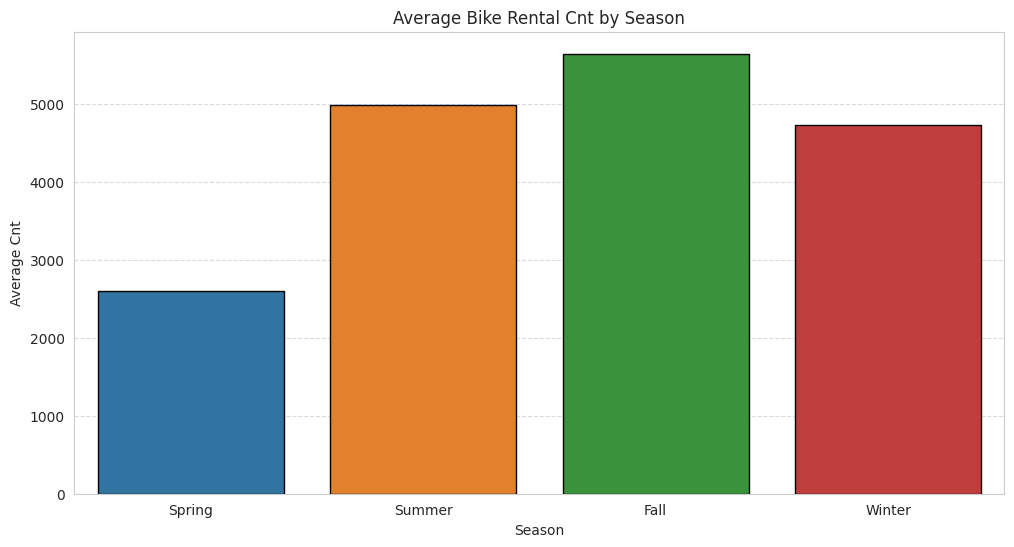

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
season_cnts=data.groupby('season')['cnt'].mean()
sns.barplot(x=season_cnts.index,y=season_cnts.values,edgecolor='black')
plt.xlabel('Season')
plt.ylabel('Average Cnt')
plt.title('Average Bike Rental Cnt by Season')
plt.xticks(range(4),['Spring','Summer','Fall','Winter'])
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.show()

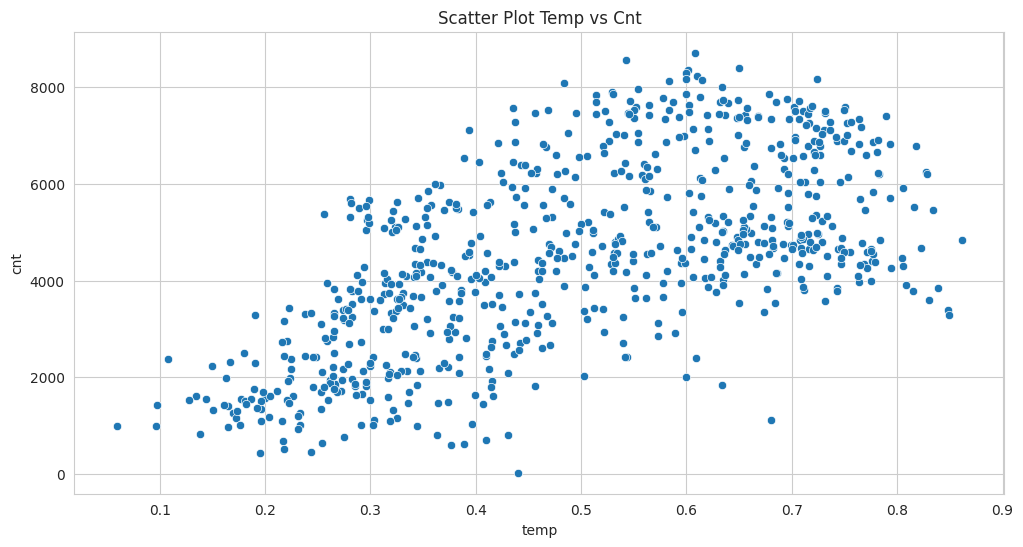

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='temp',y='cnt',data=data)
plt.xlabel('temp')
plt.ylabel('cnt')
plt.title('Scatter Plot Temp vs Cnt')
plt.show()


<ipython-input-42-0d92f0ba01fa>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=data.corr()


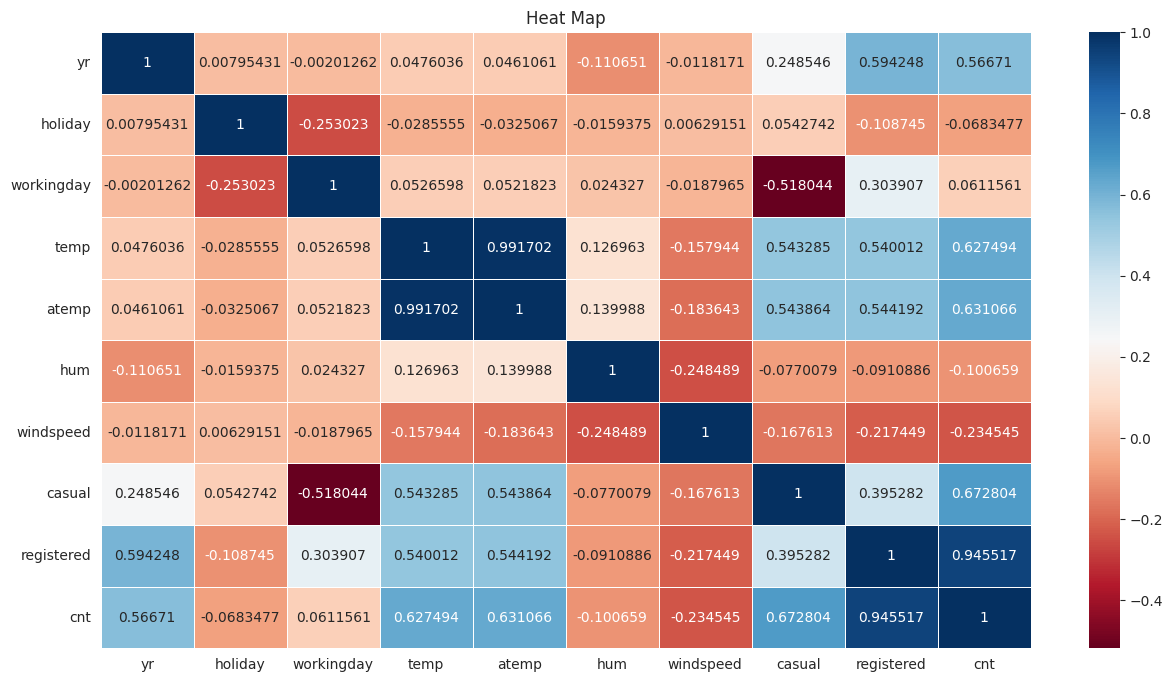

In [ ]:
fig=plt.figure(figsize=(15,8))
corr=data.corr()
plt.title('Heat Map')
ax=sns.heatmap(corr,linewidths=.5,cmap='RdBu',annot=True,fmt='g')

([<matplotlib.axis.XTick at 0x7b826948e2c0>,
 [Text(0, 0, '2011'), Text(1, 0, '2012')])

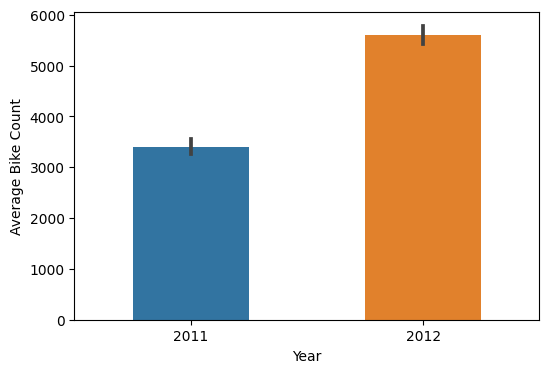

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot( x='yr',y='cnt', width = 0.5, data=data)
plt.xlabel("Year")
plt.ylabel("Average Bike Count")
plt.xticks([0, 1], ['2011', '2012'])

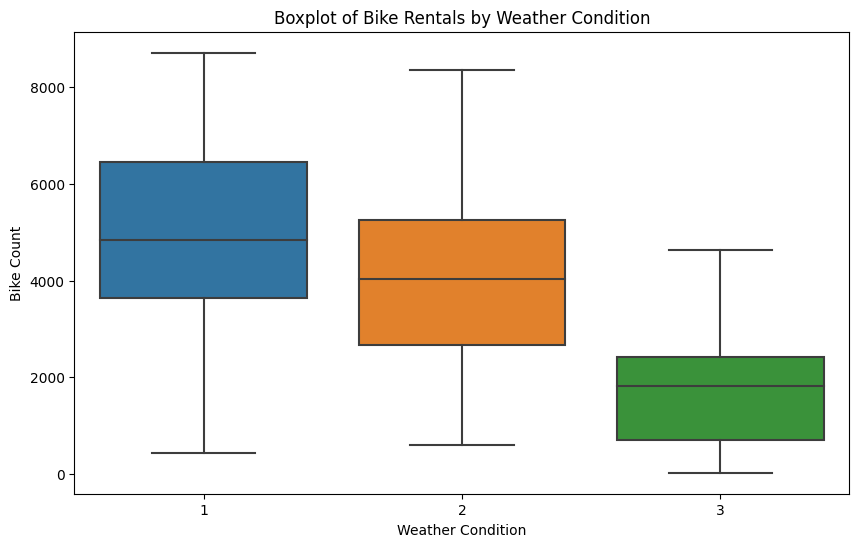

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.boxplot(x="weathersit", y="cnt", data=data)
plt.title("Boxplot of Bike Rentals by Weather Condition")
plt.xlabel("Weather Condition")
plt.ylabel("Bike Count")
plt.show()

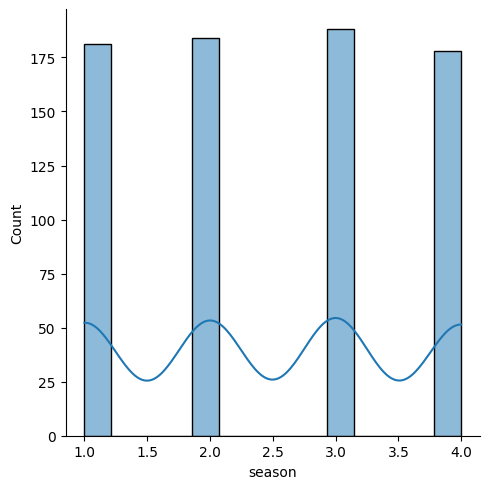

In [ ]:
plot=sns.displot(data=data['season'],kde=True)

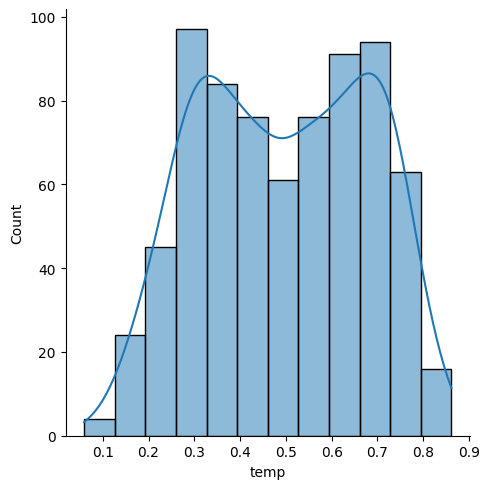

In [ ]:
plot=sns.displot(data=data['temp'],kde=True)

In [ ]:
from scipy.stats import zscore
from numpy import where,abs,median,nan,sqrt

In [ ]:
data["season"] = data["season"].replace([data["season"][(abs(zscore(data["season"])) > 3)]], median(data["season"]))

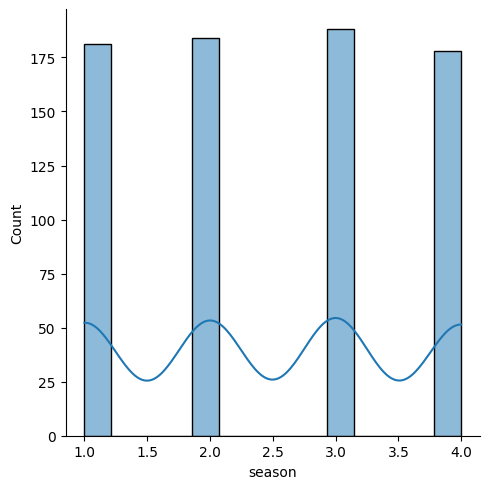

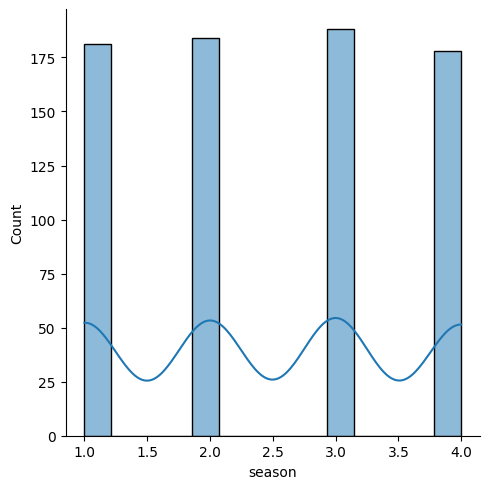

In [ ]:
plot = sns.displot(data=data["season"], kde=True)

<Axes: xlabel='season', ylabel='mnth'>

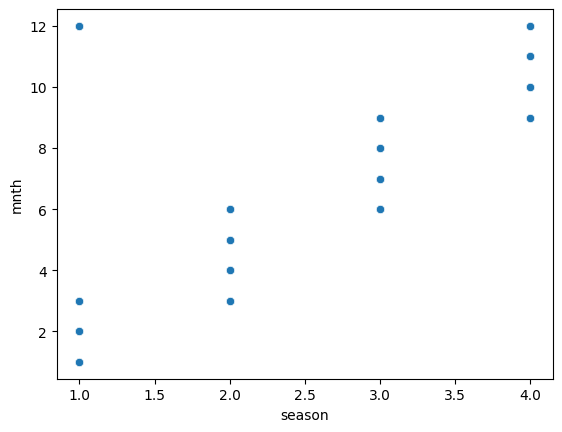

In [ ]:
sns.scatterplot(x=data.season, y=data.mnth)

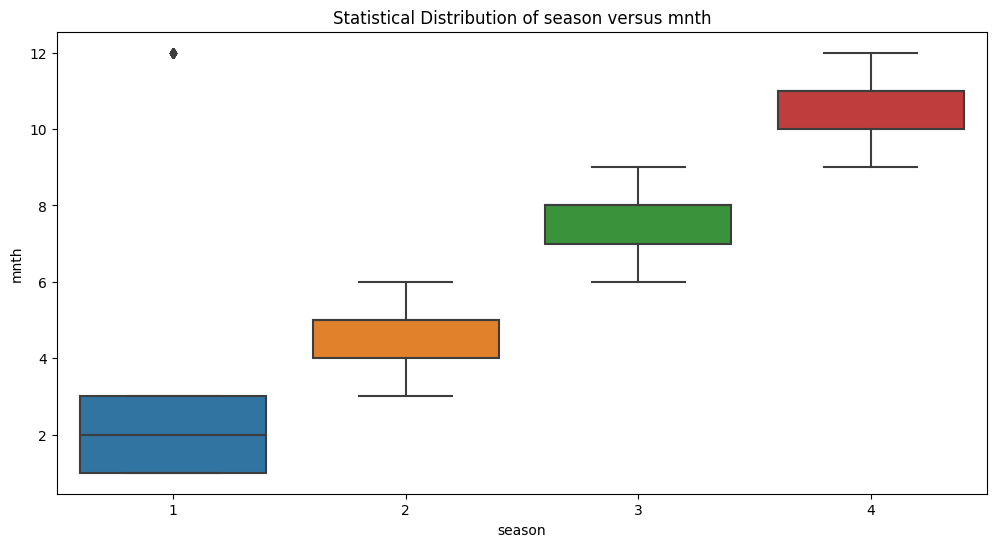

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot( x=data['season'], y=data['mnth'] )

plt.title('Statistical Distribution of season versus mnth')
plt.show()

In [ ]:
#- season field : season (1:spring, 2:summer, 3:fall, 4:winter)
season_data = data['cnt'].groupby(data['season']).sum()
season_data

season
1     471348
2     918589
3    1061129
4     841613
Name: cnt, dtype: int64

<Axes: xlabel='season'>

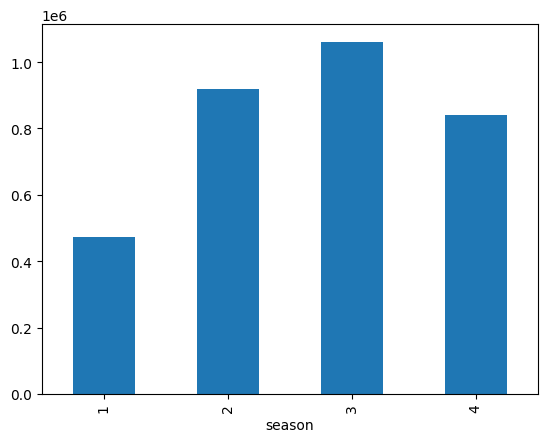

In [ ]:
season_data.plot(kind='bar')

In [ ]:
weather_data = data['cnt'].groupby(data['weathersit']).sum()
weather_data


weathersit
1    2257952
2     996858
3      37869
Name: cnt, dtype: int64

<Axes: xlabel='weathersit'>

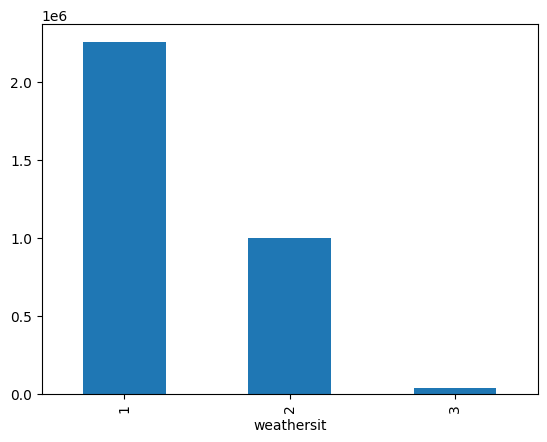

In [ ]:
weather_data.plot(kind='bar')

<Axes: xlabel='mnth', ylabel='registered'>

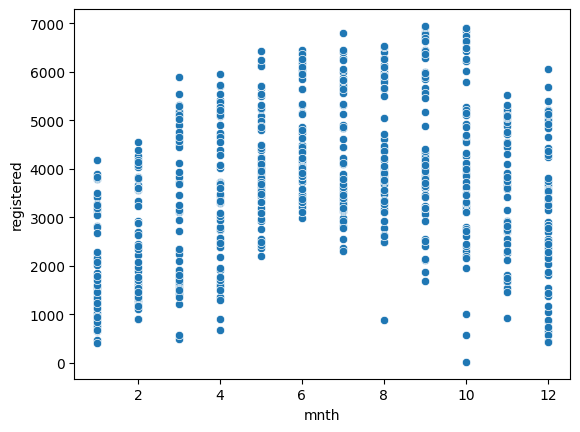

In [ ]:
sns.scatterplot(x=data.mnth,y=data.registered)

In [ ]:
data=pd.get_dummies(data,columns=['mnth'],prefix='mnth_')

In [ ]:
data=pd.get_dummies(data,columns=['hum'],prefix='hum_')

In [ ]:
X=data.drop('mnth',axis=1)
Y=data['mnth']

In [ ]:
data.isnull().sum()

instant          0
yr               0
holiday          0
weekday          0
workingday       0
                ..
hum__0.948261    0
hum__0.949583    0
hum__0.9625      0
hum__0.970417    0
hum__0.9725      0
Length: 1354, dtype: int64

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=40)

In [ ]:
#importing Linear regression from sklearn
from sklearn.linear_model import LinearRegression
reg=LinearRegression()    #instantiating linear regression
reg.fit(X_train,Y_train)

LinearRegression()

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(511, 748)
(220, 748)
(511,)
(220,)


In [ ]:
# prompt: PERFORM LINEAR REGRESSION FOR ABOVE DATA

reg.score(X_test,Y_test)


0.991964220431661

In [ ]:
print(reg.intercept_)
print(reg.coef_)

1.0831068150740055
[ 2.96321327e-02 -1.06445838e+01  8.20395778e-02  7.47672138e-03
  2.50245320e-02 -2.84719486e-02  6.45244167e-02  2.04712538e-01
  9.58949276e-02 -2.58218650e-01  2.87428042e-06 -2.82865297e-05
 -2.54122599e-05  1.99840144e-15 -4.44089210e-15  2.05868941e-01
  1.38272737e-01  1.20352233e-01  5.11007750e-02  6.32499290e-02
  5.74052297e-02  8.27123408e-02 -6.18414915e-04 -6.75411529e-02
 -7.64258891e-02 -6.38378239e-16  1.06858966e-15  1.66533454e-15
  3.88578059e-16 -4.44089210e-16 -3.26935509e-01 -1.16573418e-15
 -8.32667268e-17 -6.66133815e-16 -3.73116371e-01 -3.50086981e-01
 -4.19187843e-01 -4.51766334e-01 -5.09555165e-01  2.08166817e-16
 -6.17384737e-01 -6.42307192e-01 -6.62012442e-01 -6.14863918e-01
 -3.60822483e-16  2.95713970e-01  2.87991013e-01  2.22201049e-01
  1.43208872e-01  1.71520856e-01  7.87261833e-02  1.59404195e-01
  1.31172540e-01  7.45355016e-02 -6.45532384e-03  6.38378239e-16
  0.00000000e+00 -1.83322771e-02 -4.62593283e-02 -3.88578059e-16
 -1.69

In [ ]:
# prompt: # print the coefficients lm1.params

print(reg.coef_)


[ 2.96321327e-02 -1.06445838e+01  8.20395778e-02  7.47672138e-03
  2.50245320e-02 -2.84719486e-02  6.45244167e-02  2.04712538e-01
  9.58949276e-02 -2.58218650e-01  2.87428042e-06 -2.82865297e-05
 -2.54122599e-05  1.99840144e-15 -4.44089210e-15  2.05868941e-01
  1.38272737e-01  1.20352233e-01  5.11007750e-02  6.32499290e-02
  5.74052297e-02  8.27123408e-02 -6.18414915e-04 -6.75411529e-02
 -7.64258891e-02 -6.38378239e-16  1.06858966e-15  1.66533454e-15
  3.88578059e-16 -4.44089210e-16 -3.26935509e-01 -1.16573418e-15
 -8.32667268e-17 -6.66133815e-16 -3.73116371e-01 -3.50086981e-01
 -4.19187843e-01 -4.51766334e-01 -5.09555165e-01  2.08166817e-16
 -6.17384737e-01 -6.42307192e-01 -6.62012442e-01 -6.14863918e-01
 -3.60822483e-16  2.95713970e-01  2.87991013e-01  2.22201049e-01
  1.43208872e-01  1.71520856e-01  7.87261833e-02  1.59404195e-01
  1.31172540e-01  7.45355016e-02 -6.45532384e-03  6.38378239e-16
  0.00000000e+00 -1.83322771e-02 -4.62593283e-02 -3.88578059e-16
 -1.69498941e-01 -2.07030

In [ ]:
# prompt: perform predictions for above data

y_pred=reg.predict(X_test)
y_pred


array([ 4.46550832,  4.92392135,  3.42931647,  6.9154151 ,  6.78059316,
        1.19008541, 11.81107866,  6.88933377,  8.99035578,  1.37055839,
        7.68514668,  7.12177285, 11.31819394,  5.47035277,  5.95829811,
       10.710255  ,  5.36300046,  9.86233894, 10.26129506, 10.01657379,
       10.65989861,  4.908312  , 11.8031181 ,  1.52341481,  9.75135376,
        7.54172295,  2.82980752,  1.31272018,  7.9565959 ,  3.4089088 ,
       11.02483772, 11.41360095,  2.71265716,  8.55942253,  3.94180217,
        8.34813951,  2.09606182,  5.52282894,  4.97917631,  6.89945355,
       11.55469108,  4.91251603,  7.09889655,  3.62015833,  1.62781421,
        5.7670145 ,  8.21254755, 11.55276784,  2.17288708,  9.49062891,
        9.94833811,  7.80031836,  1.37196773, 11.47419276, 10.1015902 ,
        3.64943599,  3.1920248 ,  4.6808604 , 10.29384896,  1.72656579,
       11.33607697,  6.94412236,  7.94661185,  4.10642512,  6.82299799,
        8.65609285,  8.65102689,  6.45710671, 11.06577462, 10.39

In [ ]:
# prompt: perform mae,mse.rmse for above data

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(Y_test, predictions)
print('Mean Squared Error:', mse)
mae = mean_absolute_error(Y_test, predictions)
print('Mean Absolute Error:', mae)
rmse = sqrt(mse)
print('Root Mean Squared Error:', rmse)
r2 = r2_score(Y_test, predictions)
print('R-squared:', r2)


Mean Squared Error: 0.10593016990309799
Mean Absolute Error: 0.27058275765378476
Root Mean Squared Error: 0.32546915353547407
R-squared: 0.991964220431661


In [ ]:
# prompt: perform decision tree

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, Y_train)
clf.score(X_test, Y_test)


0.9090909090909091

In [ ]:
# prompt: decision tree with mae,mse,rmse

clf = DecisionTreeClassifier()
clf.fit(X_train, Y_train)
clf.score(X_test, Y_test)
mse = mean_squared_error(Y_test, clf.predict(X_test))
print('Mean Squared Error:', mse)
mae = mean_absolute_error(Y_test, clf.predict(X_test))
print('Mean Absolute Error:', mae)
rmse = sqrt(mse)
print('Root Mean Squared Error:', rmse)
r2 = r2_score(Y_test, clf.predict(X_test))
print('R-squared:', r2)


Mean Squared Error: 0.8590909090909091
Mean Absolute Error: 0.17727272727272728
Root Mean Squared Error: 0.9268715709799871
R-squared: 0.934830037741527


In [ ]:
# prompt: perform random forest -regression

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100)
regressor.fit(X_train, Y_train)
regressor.score(X_test, Y_test)


0.9073458992138227

In [ ]:
# prompt: random forest for mse,mae,rmse

regressor = RandomForestRegressor(n_estimators = 100)
regressor.fit(X_train, Y_train)
regressor.score(X_test, Y_test)

mse = mean_squared_error(Y_test, regressor.predict(X_test))
print('Mean Squared Error:', mse)
mae = mean_absolute_error(Y_test, regressor.predict(X_test))
print('Mean Absolute Error:', mae)
rmse = sqrt(mse)
print('Root Mean Squared Error:', rmse)
r2 = r2_score(Y_test, regressor.predict(X_test))
print('R-squared:', r2)


Mean Squared Error: 1.4725590909090907
Mean Absolute Error: 0.44990909090909087
Root Mean Squared Error: 1.213490457691815
R-squared: 0.8882928228405201


In [ ]:
# prompt: knn regression

from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train, Y_train)
knn.score(X_test, Y_test)


0.29037152207440475

In [ ]:
# prompt: knn for mae,mse,rmse

knn = KNeighborsRegressor()
knn.fit(X_train, Y_train)
knn.score(X_test, Y_test)
mse = mean_squared_error(Y_test, knn.predict(X_test))
print('Mean Squared Error:', mse)
mae = mean_absolute_error(Y_test, knn.predict(X_test))
print('Mean Absolute Error:', mae)
rmse = sqrt(mse)
print('Root Mean Squared Error:', rmse)
r2 = r2_score(Y_test, knn.predict(X_test))
print('R-squared:', r2)


Mean Squared Error: 9.354545454545455
Mean Absolute Error: 2.274545454545454
Root Mean Squared Error: 3.0585201412685605
R-squared: 0.29037152207440475


In [ ]:
# prompt: svm regression

from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=40)
reg = SVR()
reg.fit(X_train, Y_train)
reg.score(X_test, Y_test)
y_pred=reg.predict(X_test)
mse = mean_squared_error(Y_test, y_pred)
print('Mean Squared Error:', mse)
mae = mean_absolute_error(Y_test, y_pred)
print('Mean Absolute Error:', mae)
rmse = sqrt(mse)
print('Root Mean Squared Error:', rmse)
r2 = r2_score(Y_test, y_pred)
print('R-squared:', r2)


Mean Squared Error: 11.587939204042897
Mean Absolute Error: 2.717470907306952
Root Mean Squared Error: 3.404106226903458
R-squared: 0.12094802472058064


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
